In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/2020_AU_Region_Mobility_Report.csv')
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-15,4.0,3.0,-2.0,3.0,3.0,0.0
1,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-16,3.0,5.0,9.0,3.0,-1.0,0.0
2,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-17,-1.0,0.0,-6.0,7.0,17.0,-2.0
3,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-18,-3.0,-2.0,-13.0,7.0,14.0,-1.0
4,AU,Australia,NaN,NaN,NaN,NaN,NaN,ChIJ38WHZwf9KysRUhNblaFnglM,2020-02-19,-1.0,-1.0,-6.0,8.0,13.0,-1.0


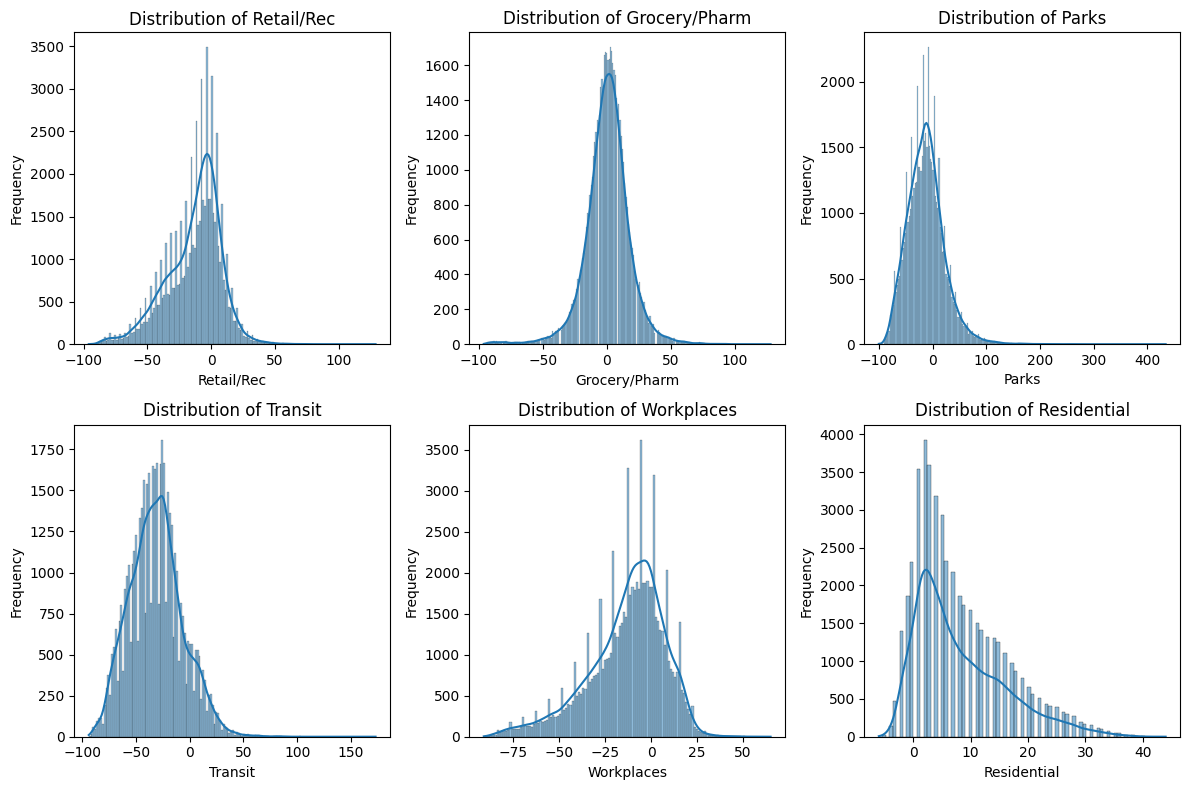

Summary Statistics:
         Retail/Rec  Grocery/Pharm         Parks       Transit    Workplaces  \
count  66554.000000   56171.000000  58192.000000  50013.000000  78609.000000   
mean     -13.287781       0.674084    -12.211438    -31.211025    -13.250569   
std       21.299059      17.413418     34.752009     24.713341     20.778223   
min      -96.000000     -96.000000   -100.000000    -94.000000    -91.000000   
25%      -26.000000      -8.000000    -36.000000    -48.000000    -24.000000   
50%       -9.000000       1.000000    -14.000000    -32.000000    -10.000000   
75%        1.000000      10.000000      7.000000    -16.000000      1.000000   
max      129.000000     128.000000    434.000000    173.000000     65.000000   

        Residential  
count  48487.000000  
mean       8.087652  
std        7.882133  
min       -6.000000  
25%        2.000000  
50%        6.000000  
75%       13.000000  
max       44.000000  

Missing Values:
Region             321
Date                 

In [ ]:
short_column_names = {
    'sub_region_1': 'Region',
    'date': 'Date',
    'retail_and_recreation_percent_change_from_baseline': 'Retail/Rec',
    'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery/Pharm',
    'parks_percent_change_from_baseline': 'Parks',
    'transit_stations_percent_change_from_baseline': 'Transit',
    'workplaces_percent_change_from_baseline': 'Workplaces',
    'residential_percent_change_from_baseline': 'Residential'
}

data = data.rename(columns=short_column_names)

# Select the columns of interest with shorter names
columns_of_interest = list(short_column_names.values())

# Create a subset of the DataFrame with selected columns
subset_df = data[columns_of_interest]

# Summarize statistics for numeric columns
summary_stats = subset_df.describe()

# Check for missing values
missing_values = subset_df.isnull().sum()

# Visualize data distributions
plt.figure(figsize=(12, 8))

# Loop through the columns and create histograms
for i, col in enumerate(columns_of_interest[2:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(subset_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display summary statistics and missing value counts
print("Summary Statistics:")
print(summary_stats)

print("\nMissing Values:")
print(missing_values)


<ipython-input-4-b442885034ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


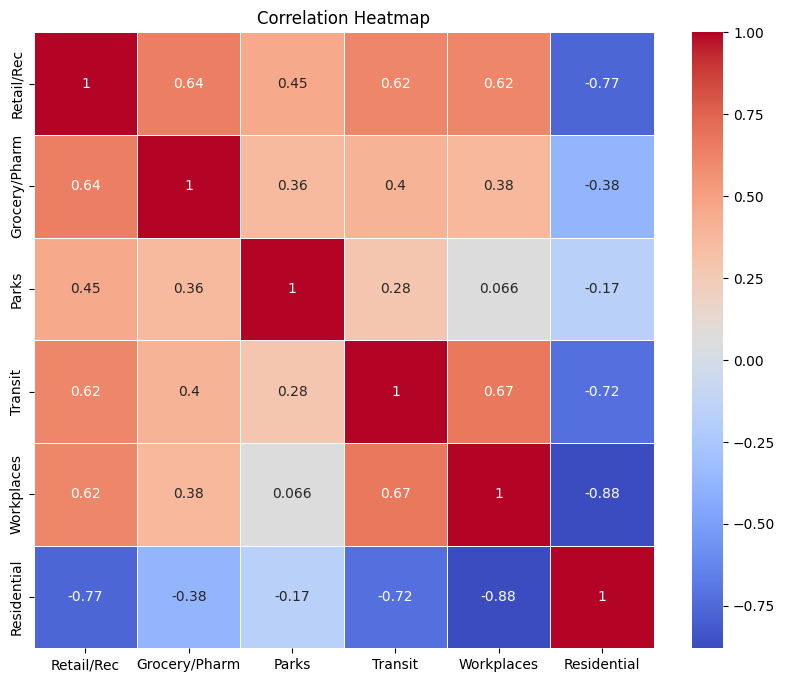

In [ ]:
# Create a heatmap to visualize correlations between numeric columns
correlation_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


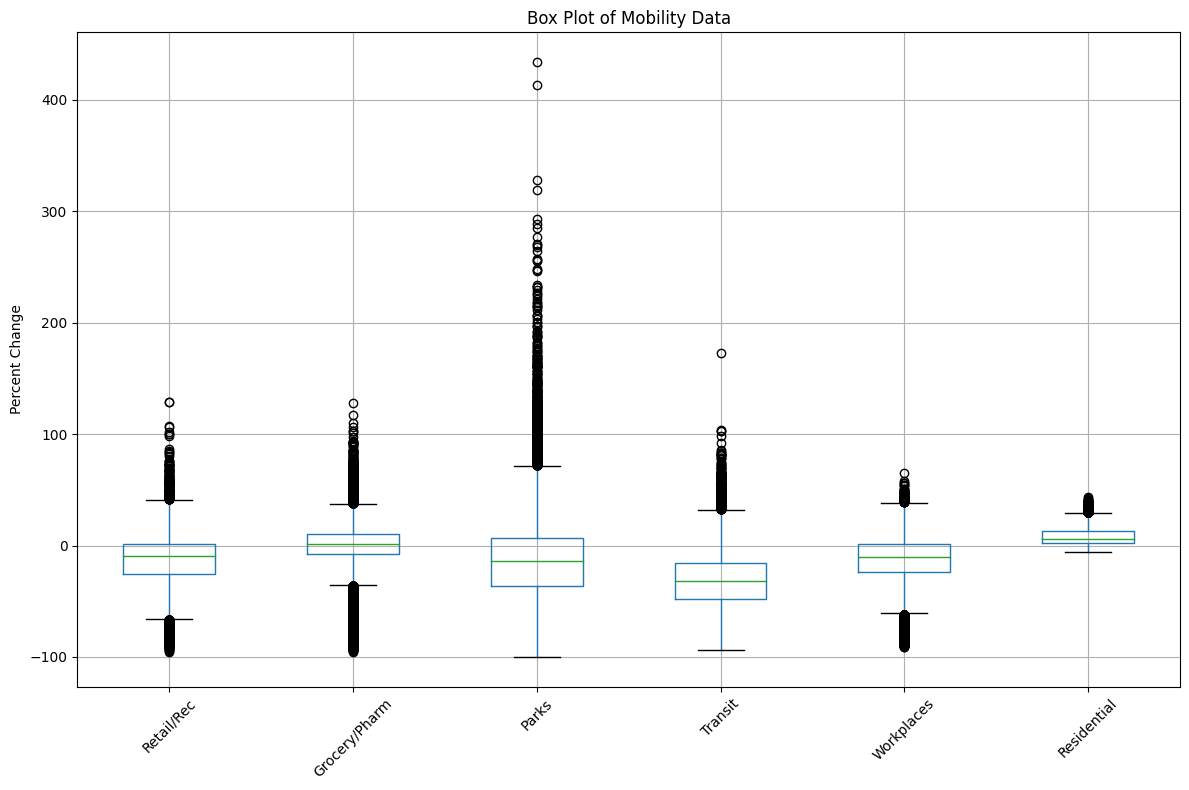

In [ ]:

# Create box plots for selected columns
subset_df.boxplot(figsize=(12, 8), rot=45)
plt.title('Box Plot of Mobility Data')
plt.ylabel('Percent Change')
plt.tight_layout()
plt.show()


In [ ]:
data.fillna(0)
data.isna().any().sum()
data.count()

country_region_code    85330
country_region         85330
Region                 85009
sub_region_2           82441
metro_area                 0
iso_3166_2_code         2568
census_fips_code           0
place_id               85330
Date                   85330
Retail/Rec             66554
Grocery/Pharm          56171
Parks                  58192
Transit                50013
Workplaces             78609
Residential            48487
dtype: int64

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
85325    False
85326    False
85327    False
85328    False
85329    False
Length: 85330, dtype: bool